In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# windows 용 한글 폰트 오류 해결
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

In [3]:
# 
kto_201001 = pd.read_excel("./data/trip/kto_201001.xlsx", 
                           usecols = "A:G", # 필요한 컬럼만 가져오기
                           header=1, 
                           skipfooter= 4
                          )

In [4]:
kto_201001

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,329131,18238,421,4339,80916,433045
1,일본,202825,1750,89,549,3971,209184
2,대만,35788,41,17,37,516,36399
3,홍콩,13874,55,0,21,595,14545
4,마카오,554,0,0,0,0,554
...,...,...,...,...,...,...,...
62,아프리카 기타,349,594,25,86,296,1350
63,기타대륙,10,3,0,0,0,13
64,국적미상,10,3,0,0,0,13
65,교포소계,0,0,0,0,22537,22537


# 데이터 탐색

- 데이터가 2010년 01월부터 2020년 5월까지 월별로 분할되어 있기 때문에 각각 월별로 데이터를 하나씩 가져와 하나의 테이블로 통합해야함

In [5]:
kto_201001.shape

(67, 7)

In [6]:
kto_201001.dtypes

국적       object
관광        int64
상용        int64
공용        int64
유학/연수     int64
기타        int64
계         int64
dtype: object

In [7]:
kto_201001.isna().sum()

국적       0
관광       0
상용       0
공용       0
유학/연수    0
기타       0
계        0
dtype: int64

In [8]:
kto_201001.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,11964.716418,683.462687,81.731343,152.776119,4115.910448,16998.597015
std,47055.349998,2639.234303,370.034666,622.299519,11560.294887,59189.624627
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,254.000000,23.500000,0.000000,6.000000,161.500000,605.000000
50%,554.000000,47.000000,2.000000,17.000000,449.000000,1350.000000
75%,3638.000000,301.000000,14.000000,54.500000,1608.000000,7582.000000
max,329131.000000,18238.000000,2159.000000,4339.000000,80916.000000,433045.000000


- 평균적으로 관광 목적으로 가장 많은 외국인 이 입국함
- 계를 제외한 모든 컬럼에서 최솟값이 0 임
    - 확인 필요

In [9]:
(kto_201001[kto_201001["관광"] == 0] ) | (kto_201001[kto_201001["상용"] == 0]) |(kto_201001[kto_201001["공용"] == 0]) | (kto_201001[kto_201001["유학"] == 0]) | (kto_201001[kto_201001["기타"] == 0]) 

TypeError: unsupported operand type(s) for |: 'str' and 'str'

- 교포소계와 교포는 4개 컬럼이 모두 0

## 기준 연월 추가
- 각 월별 데이터가 추가될 예정이기 때문에 각 데이터마다 기준 연월 정보가 추가되어야함

In [47]:

kto_201001_country["기준연월"] = "2010-01"


In [48]:
kto_201001_country

,국적,관광,상용,공용,유학/연수,기타,계,관광객비율(%),전체비율(%),대륙,기준연월
0,일본,202825,1750,89,549,3971,209184,76.0,50.6,아시아,2010-01
17,중국,40425,11930,55,2751,36091,91252,70.2,10.1,아시아,2010-01
1,대만,35788,41,17,37,516,36399,97.0,8.9,아시아,2010-01
25,미국,26943,1195,2145,135,12647,43065,40.4,6.7,아시아,2010-01
2,홍콩,13874,55,0,21,595,14545,98.3,3.5,아시아,2010-01
4,태국,13374,39,13,53,4335,17814,100.0,3.3,아시아,2010-01
53,오스트레일리아,6974,340,9,10,1098,8431,19.6,1.7,아시아,2010-01
31,독일,5838,255,24,68,1458,7643,58.7,1.5,아시아,2010-01
30,영국,5746,383,4,20,1368,7521,60.0,1.4,아시아,2010-01
47,러시아,4861,505,15,83,5409,10873,70.3,1.2,아시아,2010-01


## 국적 확인

In [ ]:
kto_201001["국적"].unique()

- 아시아주, 미주, 교포소계등 국가가 아닌 값이 포함되어 있음

In [15]:
contents_list = ["아시아주", "미주", "구주", "대양주","아프리카주", "기타대륙", "교포소계"]

In [16]:
kto_201001_country = kto_201001[kto_201001["국적"].isin(contents_list) == False]

In [ ]:
kto_201001_country

In [17]:
# 인덱스 초기화
kto_201001_country = kto_201001_country.reset_index(drop=True)

In [18]:
kto_201001_country.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,일본,202825,1750,89,549,3971,209184
1,대만,35788,41,17,37,516,36399
2,홍콩,13874,55,0,21,595,14545
3,마카오,554,0,0,0,0,554
4,태국,13374,39,13,53,4335,17814


In [ ]:
# 대륙컬럼을 추가하면...
# 각 대륙별 데이터 개수 파악
kto_201001[kto_201001["국적"].isin(contents_list)]

- 대륙 컬럼의 내용은 순서대로 아시아 25개, 미주 5개, 유럽 23개, 오세아니아 3개, 아프리카 2개, 기타 1개, 교포 1개

In [44]:
continents = ["아시아"] * 25 + ["아메리카"] * 5 + ["유럽"] * 23 + ["오세아니아"] * 3 + ["아프리카"] * 2 + ["기타대륙"] * 1 + ["교포"] * 1 

In [45]:
kto_201001_country["대륙"] = continents

## 국적별 관광객 비율

In [24]:

kto_201001_country["관광객비율(%)"] = round((kto_201001["관광"] /  kto_201001["계"]) * 100 , 1)

In [25]:
kto_201001_country

,국적,관광,상용,공용,유학/연수,기타,계,전체비율(%,관광객비율(%)
0,일본,202825,1750,89,549,3971,209184,50.6,76.0
1,대만,35788,41,17,37,516,36399,8.9,97.0
2,홍콩,13874,55,0,21,595,14545,3.5,98.3
3,마카오,554,0,0,0,0,554,0.1,95.4
4,태국,13374,39,13,53,4335,17814,3.3,100.0
5,말레이시아,3292,61,0,49,1157,4559,0.8,75.1
6,필리핀,3984,219,104,87,16820,21214,1.0,72.2
7,인도네시아,1840,327,3,65,2826,5061,0.5,18.8
8,싱가포르,4201,120,3,27,1017,5368,1.0,36.4
9,미얀마,630,18,54,10,3882,4594,0.2,78.3


In [26]:
# 관광객 비율 컬럼으로 내림차순 정렬
kto_201001_country.sort_values("관광객비율(%)", ascending = False)

,국적,관광,상용,공용,유학/연수,기타,계,전체비율(%,관광객비율(%)
4,태국,13374,39,13,53,4335,17814,3.3,100.0
2,홍콩,13874,55,0,21,595,14545,3.5,98.3
1,대만,35788,41,17,37,516,36399,8.9,97.0
3,마카오,554,0,0,0,0,554,0.1,95.4
20,터키,472,15,2,15,465,969,0.1,92.5
39,벨기에,322,25,1,8,104,460,0.1,84.1
57,아프리카 기타,349,594,25,86,296,1350,0.1,82.7
46,우크라이나,386,29,0,6,1515,1936,0.1,82.6
38,노르웨이,517,274,0,6,149,946,0.1,81.8
56,남아프리카공화국,214,27,0,2,545,788,0.1,81.3


In [27]:
# 오름차순
kto_201001_country.sort_values("관광객비율(%)")

,국적,관광,상용,공용,유학/연수,기타,계,전체비율(%,관광객비율(%)
13,파키스탄,70,200,1,41,402,714,0.0,6.0
14,방글라데시,86,84,9,42,489,710,0.0,9.8
19,이스라엘,792,11,0,0,53,856,0.2,11.5
15,캄보디아,102,22,0,25,131,280,0.0,12.1
10,베트남,1384,284,21,150,2676,4515,0.3,13.7
22,카자흐스탄,238,48,4,22,107,419,0.1,14.8
7,인도네시아,1840,327,3,65,2826,5061,0.5,18.8
53,오스트레일리아,6974,340,9,10,1098,8431,1.7,19.6
49,루마니아,142,12,0,9,370,533,0.0,19.9
52,구주 기타,1219,37,0,49,410,1715,0.3,26.6


In [ ]:
# 대륙별 관광객 비율

kto_201001_country.groupby("대륙")["관광객비율(%)"].mean()

- 내가 값을 잘못냈지만... 일단 강사님쪽에서는 오세아니아의 비율이 높음

- 관광목적으로 방문하는 외국인은 26.6% 뿐임

- 아시아의 관광객 비율은 49.5%로 유럽보다 나듬

- 소득수준이 낮은 국가에서는 관광 목적으로 방문하는 외국인 비율이 낮은 것으로 보임

In [10]:
kto_201001_country[kto_201001_country["국적"] == "중국"]

,국적,관광,상용,공용,유학/연수,기타,계
18,중국,40425,11930,55,2751,36091,91252


#### 관광관련 파생변수 만든것임
- 기준연월, 대륙, 관광객비율(%)

## 전처리하고 다른 파일거 이어붙힐꺼임~

In [ ]:
# 우리나라에 오는 관광객 중 이 나라의 관광객이 몇퍼센트인가?

## 전체 외국인 관광객 대비 국적별 관광객 비율

In [13]:
kto_201001.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,349,594,25,86,296,1350
63,기타대륙,10,3,0,0,0,13
64,국적미상,10,3,0,0,0,13
65,교포소계,0,0,0,0,22537,22537
66,교포,0,0,0,0,22537,22537


In [19]:
# 전체 관광객
tourist_sum = sum(kto_201001_country["관광"])
tourist_sum

400818

In [34]:
# 비율계산
kto_201001_country["전체비율(%)"] = round(
    kto_201001_country["관광"] / tourist_sum * 100 , 1
)

In [35]:
kto_201001_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,76.0,50.6
1,대만,35788,41,17,37,516,36399,97.0,8.9
2,홍콩,13874,55,0,21,595,14545,98.3,3.5
3,마카오,554,0,0,0,0,554,95.4,0.1
4,태국,13374,39,13,53,4335,17814,100.0,3.3


In [49]:
kto_201001_country = kto_201001_country.sort_values(by="전체비율(%)", ascending = False)

In [50]:
kto_201001_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,관광객비율(%),전체비율(%),대륙,기준연월
0,일본,202825,1750,89,549,3971,209184,76.0,50.6,아시아,2010-01
17,중국,40425,11930,55,2751,36091,91252,70.2,10.1,아시아,2010-01
1,대만,35788,41,17,37,516,36399,97.0,8.9,아시아,2010-01
25,미국,26943,1195,2145,135,12647,43065,40.4,6.7,아시아,2010-01
2,홍콩,13874,55,0,21,595,14545,98.3,3.5,아시아,2010-01


# 데이터 전처리 

- 모든 파일에 대해 같은 작업을 반복해야해서 함수로 정리

In [51]:
def create_kto_data(yy, mm): # yy = 2014, mm = 01
    # 1. 불러올 엑셀 파일 경로를 지정
    file_path = f"./data/trip/kto_{yy}{mm}.xlsx"

    # 2. 엑셀 파일 불러오기 
    df = pd.read_excel(file_path, header = 1, skipfooter = 4, usecols = "A:G")

    # 3. 기준연월 컬럼 추가
    df["기준연월"] = f"{yy}-{mm}"

    # 4. 국적 컬럼에서 대륙 제거하고 국가만 남기기
    # 제거할 대륙명 선정
    ignore_list = ["아시아주", "미주", "구주", "대양주","아프리카주", "기타대륙", "교포소계"]
    condition = df["국적"].isin(ignore_list) == False
    df_contry = df[condition].reset_index(drop = True)

    # 5. 대륙 컬럼 추가
    continents = ["아시아"] * 25 + ["아메리카"] * 5 + ["유럽"] * 23 + ["오세아니아"] * 3 + ["아프리카"] * 2 + ["기타대륙"] * 1 + ["교포"] * 1 
    df_contry["대륙"] = continents

    # 6. 국가별 관광객 비율 만들기
    df_contry["관광객비율(%)"] = round((df_contry["관광"] /  df["계"]) * 100 , 1)

    # 7. 전체 전체비율 만들기
    tourist_sum = sum(df["관광"])
    df_contry["전체비율(%)"] = round( df_contry["관광"] / tourist_sum * 100 , 1)

    # 8. 결과 반환
    return df_contry

## 반복문을 통해 다수의 엑셀 데이터를 불러와서 합치기

In [64]:
# 2010년 2월 데이터로 함수 테스트

df = pd.DataFrame()

for yy in range(2010, 2021):
    for mm in range(1,13):
        # print(f"{i:02d}") # 방법 1 : 파이썬기초 포멧팅 
        # print(str(i).zfill(2)) # 빙밥 2 : zfill 이용
        
        tmp = create_kto_data(yy, str(mm).zfill(2))
        df = pd.concat([df,tmp], ignore_index = True)
        
        if yy == 2020 and mm == 5:
            break

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7500 non-null   object 
 1   관광        7500 non-null   int64  
 2   상용        7500 non-null   int64  
 3   공용        7500 non-null   int64  
 4   유학/연수     7500 non-null   int64  
 5   기타        7500 non-null   int64  
 6   계         7500 non-null   int64  
 7   기준연월      7500 non-null   object 
 8   대륙        7500 non-null   object 
 9   관광객비율(%)  7500 non-null   float64
 10  전체비율(%)   7500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 644.7+ KB


In [67]:
# 통합 데이터 저장
df.to_excel("kto_total.xlsx", index = False)

## 국적별 필터링 데이터 저장

- 경우에 따라서는 개별 데이터를 사용해야하는 경우도 있음
- 관광객 데이터르 국적별로 필터링해서 60개의 엑셀 파일로 저장

In [71]:
contry_list = df["국적"].unique()

In [72]:
# 국적 리스트
contry_list

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [74]:
for country in contry_list:
    # contry 라는 폴더에 저장할거싱에요 ( contry 폴더 만듬)

    df_filter = df[df["국적"] == country]


    df_filter.to_excel(f"./data/country/[국적별관광객데이터]{country}.xlsx", index = False)
     

# 데이터 분석

## 꺾은 선 그래프

In [75]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,46.8,25.3
1,대만,35788,41,17,37,516,36399,2010-01,아시아,17.1,4.5
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,38.1,1.7
3,마카오,554,0,0,0,0,554,2010-01,아시아,3.8,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,2414.1,1.7


In [76]:
# 일본, 중국, 대만, 미국, 홍콩 상위 5위로 뽑아서 분석해야겠어용

df_filter = df[df["국적"] == "중국"]

In [77]:
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,1216.2,5.0
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,1691.5,6.8
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,1528.4,4.6
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,3354.0,7.8
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,3049.9,8.5


['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01']


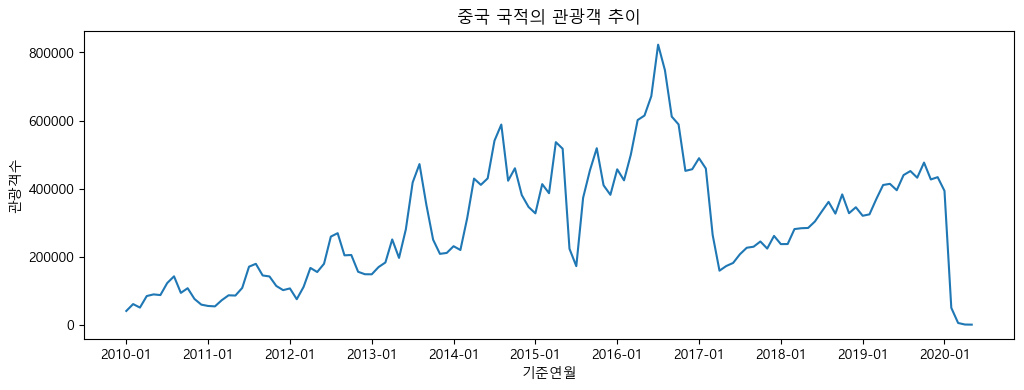

In [79]:
plt.figure(figsize = (12,4))

plt.plot(df_filter["기준연월"], df_filter["관광"])
plt.title("중국 국적의 관광객 추이")

plt.xlabel("기준연월")
plt.ylabel("관광객수")

# 1월달 단위로 찍어부렸으~
t_tick = [f"{i}-01" for i in range(2010,2021)] # 이렇게 편집이가능해???
print(t_tick)
plt.xticks(t_tick)

plt.show()